# Start by simply loading the data from CSV

In [129]:
import pandas as pd

In [130]:
df = pd.read_csv('CrowdActivityExport_09132018_03-15PM.csv', true_values='Yes', false_values='No', na_values='-')

## Let's have a look at it...

In [131]:
df

,Question Number,Question Title,Voted On Question?,Vote Index,Vote Title,Voter Name,Voter Email,Vote Time
0,1,What is the Population of Nashville?,Yes,A,35000.0,Anonymous,Email Not Captured,"Sep 7, 2018 4:04 PM"
1,1,What is the Population of Nashville?,Yes,B,5.0,Anonymous,Email Not Captured,"Sep 7, 2018 8:10 PM"
2,1,What is the Population of Nashville?,Yes,C,5000000.0,Anonymous,Email Not Captured,"Sep 7, 2018 8:10 PM"
3,1,What is the Population of Nashville?,Yes,D,350000.0,Anonymous,Email Not Captured,"Sep 7, 2018 8:10 PM"
4,1,What is the Population of Nashville?,No,NaN,NaN,MegsIsAwesome,Email Not Captured,NaN
5,2,How many miles did the bus drive to get here?,Yes,A,429.0,Anonymous,Email Not Captured,"Sep 7, 2018 4:04 PM"
6,2,How many miles did the bus drive to get here?,Yes,B,250.0,Anonymous,Email Not Captured,"Sep 7, 2018 8:10 PM"
7,2,How many miles did the bus drive to get here?,No,NaN,NaN,MegsIsAwesome,Email Not Captured,NaN
8,2,How many miles did the bus drive to get here?,No,NaN,NaN,Anonymous,Email Not Captured,NaN
9,2,How many miles did the bus drive to get here?,No,NaN,NaN,Anonymous,Email Not Captured,NaN


## Let's create some example charts using Seaborn

In [132]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Here is a simple scatter plot for one category. I've also printed the question as the label on the y-axis.

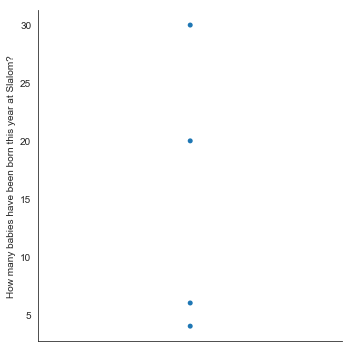

In [82]:
q = df[df['Question Number'] == 9][['Question Number', 'Vote Title', 'Question Title']]
fig = sns.catpwlot(y="Vote Title", kind="swarm", data=q)
plt.ylabel(q['Question Title'][:1].values[0])
plt.show()

## Here is a box chart, which is more useful since it actually shows the max, min, and mean.

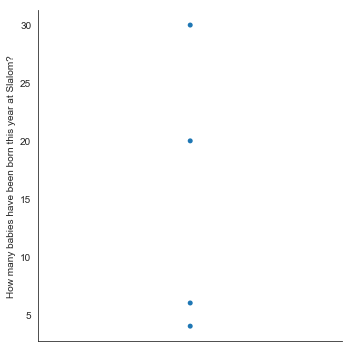

In [141]:
q = df[df['Question Number'] == 9][['Question Number', 'Vote Title', 'Question Title']]
fig = sns.catplot(y="Vote Title", kind="swarm", data=q)
plt.ylabel(q['Question Title'][:1].values[0])
plt.show()

# Here is a loop to print out all of the results as box charts.

In [80]:
df['Question Number'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
for i in df['Question Number'].unique():
    q = df[df['Question Number'] == i][['Question Number', 'Vote Title', 'Question Title']]
    fig = sns.catplot(y="Vote Title", kind="box", data=q)
    plt.ylabel(q['Question Title'][:1].values[0])
    plt.show()

# OK, let's try a little PDF generation here...

In [114]:
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Table, Image

## Save the figure as a PNG so we can open it via PIL and convert it to a ReportLab flowable.

In [115]:
import PIL
from io import BytesIO
fig.savefig("q9.png")
im = PIL.Image.open("q9.png")

In [116]:
buf = BytesIO()
im.save(buf, 'PNG')
im = Image(buf)

#### Load the data to be displayed into a table and then build the PDF.

In [125]:
import numpy as np
tabledata = [np.array([im], dtype=object).tolist()]
table = Table(tabledata)

In [126]:
doc = SimpleDocTemplate("my.pdf", pagesize=letter)
doc.build([table])